In [5]:
#%% Libraries
import pandas as pd
import warnings
import pandas as pds
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
from sklearn.utils import resample
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.feature_selection import RFECV as RFECV_SKYLEARN
pd.options.display.max_columns = 100
#pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import Audio, display
def allDone():
    display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))

# Explore

In [93]:
#%% Explore
albert = pd.read_csv('C:/Users/user/Documents/1. GitHub/Albert_Einstein/data.csv')
print(albert.columns)
print(albert.shape)
print(albert.isnull().value_counts())
print(albert.info())

albert.head(5)

Index(['x1', 'x2', 'x3', 'target'], dtype='object')
(10000, 4)
x1     x2     x3     target
False  False  False  False     10000
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10000 non-null  float64
 1   x2      10000 non-null  float64
 2   x3      10000 non-null  float64
 3   target  10000 non-null  object 
dtypes: float64(3), object(1)
memory usage: 312.6+ KB
None


,x1,x2,x3,target
0,2.71,10.39,-36.45,med
1,9.88,5.76,-54.63,med
2,82.87,1.73,0.83,med
3,12.99,10.40,-59.60,med
4,60.10,8.84,-45.87,med


In [94]:
# Order categories
categories = pd.Categorical(albert['target'], 
                            categories=['low', 'med', 'high'], ordered=True)
categories
# Label your target with numerical values
labels, unique = pd.factorize(categories, sort=True)
albert['target'] = labels
albert['target'].value_counts()
#albert.groupby(['target']).count()

albert

['med', 'med', 'med', 'med', 'med', ..., 'high', 'high', 'high', 'high', 'high']
Length: 10000
Categories (3, object): ['low' < 'med' < 'high']

0    6000
2    3000
1    1000
Name: target, dtype: int64

,x1,x2,x3,target
0,2.71,10.39,-36.45,1
1,9.88,5.76,-54.63,1
2,82.87,1.73,0.83,1
3,12.99,10.40,-59.60,1
4,60.10,8.84,-45.87,1
...,...,...,...,...
9995,65.03,13.47,-28.30,2
9996,62.24,7.42,-50.47,2
9997,45.37,3.68,-33.13,2
9998,-1.97,6.07,-28.04,2


In [88]:
albert.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,10000.0,42.669613,25.597848,-19.50,21.675,42.940,64.135,101.52
x2,10000.0,9.023236,5.180151,0.17,5.260,8.075,11.730,43.08
x3,10000.0,-24.603198,20.138584,-59.98,-41.920,-24.555,-7.080,9.99
target,10000.0,0.700000,0.900045,0.00,0.000,0.000,2.000,2.00


,x1,x2,x3
target,,,
0,6000,6000,6000
1,1000,1000,1000
2,3000,3000,3000


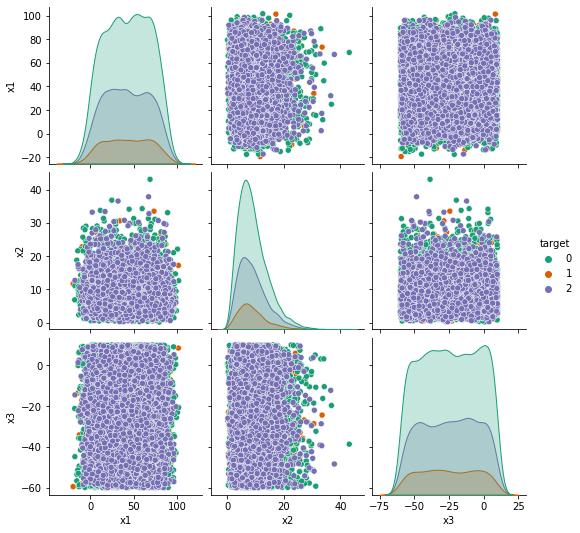

In [6]:
import seaborn as sns
sns.pairplot(albert, hue='target', palette='Dark2')
plt.savefig('C:/Users/user/Documents/1. GitHub/Albert_Einstein/pairplot1.png')

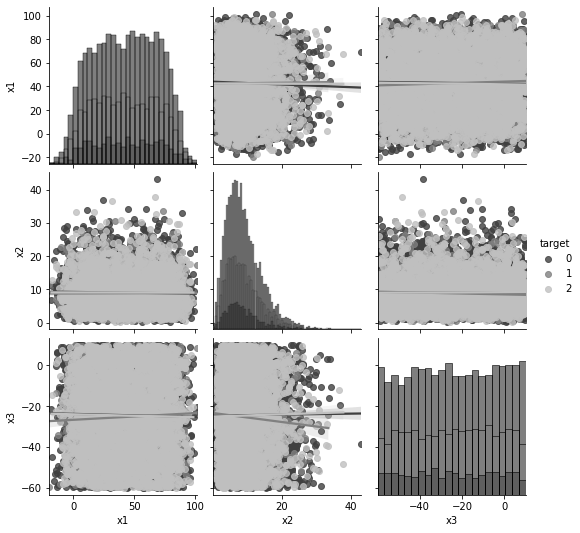

In [7]:
sns.pairplot(albert,hue = 'target',diag_kind = 'hist',kind = 'reg',palette = 'binary_r')
plt.savefig('C:/Users/user/Documents/1. GitHub/Albert_Einstein/pairplot2.png')

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Correlation Heatmap')

<Figure size 576x864 with 0 Axes>

Text(0.5, 1.0, 'Features Correlating with target')

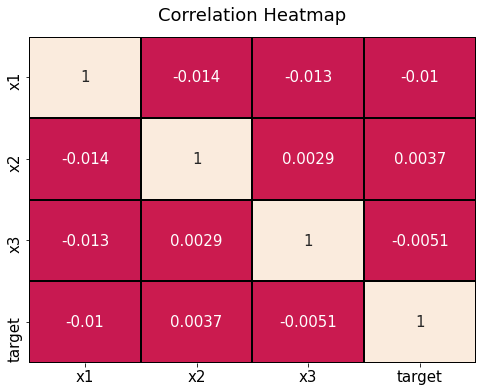

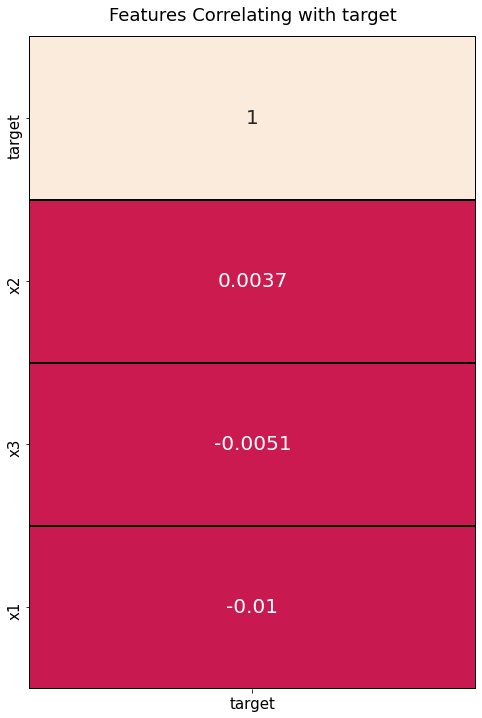

In [8]:
# Increase the size of the heatmap.
plt.figure(figsize=(8, 6))
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap1 = sns.heatmap(albert.corr(), vmin=-1, vmax=1, annot=True, linewidths=2, linecolor='black', annot_kws={"size": 15}, cbar=False)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap1.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
heatmap1.tick_params(labelsize=15)
plt.savefig('C:/Users/user/Documents/1. GitHub/Albert_Einstein/heatmap1.png')

plt.figure(figsize=(8, 12))
heatmap2 = sns.heatmap(albert.corr()[['target']].sort_values(by='target', ascending=False), vmin=-1, vmax=1, annot=True, linewidths=2, linecolor='black', annot_kws={"size": 20}, cbar=False) #, cmap='BrBG')
heatmap2.set_title('Features Correlating with target', fontdict={'fontsize':18}, pad=16)
heatmap2.tick_params(labelsize=15)
plt.savefig('C:/Users/user/Documents/1. GitHub/Albert_Einstein/heatmap2.png')

In [9]:
from pandas_profiling import ProfileReport
profile = ProfileReport(albert, title="albert", explorative=True)

profile.to_widgets()
#profile.to_notebook_iframe()
profile.to_file("C:/Users/user/Documents/1. GitHub/Albert_Einstein/albert_report.html")

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 3d Plot

In [6]:
#Importing the necessary packages and libaries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#Open File
albert = pd.read_csv('C:/Users/user/Documents/1. GitHub/Albert_Einstein/data.csv')
# Order categories
categories = pd.Categorical(albert['target'], categories=['low', 'med', 'high'], ordered=True)
categories
# Label your target with numerical values
labels, unique = pd.factorize(categories, sort=True)
albert['target'] = labels

In [7]:
# Get a Sample
albert = albert.sample(n = 150)
# Set your variables, separating your target from the rest of the features
X = albert[['x1', 'x2', 'x3']]
y = albert['target']
# Convert to Array (necessary to plot)
X = X.values

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\mpl_toolkits\mplot3d\art3d.py:901: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\mpl_toolkits\mplot3d\art3d.py:903: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


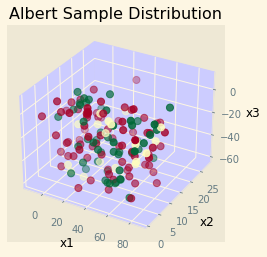

In [9]:
# Static plot
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed
import pylab as p
#setting the 3rd dimension with RBF centered on the middle clump
r = np.exp(-(X ** 2).sum(1))

ax = plt.subplot(projection='3d')
plt.style.use('Solarize_Light2')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], r, c=y, s=50, cmap=plt.cm.get_cmap('RdYlGn', 3))
ax.set_xlabel('x1', color = 'black')
ax.set_ylabel('x2', color = 'black')
ax.set_zlabel('x3', color = 'black')
ax.w_xaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
ax.w_yaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
ax.w_zaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
ax.patch.set_alpha(1.0)
#ax.patch.set_facecolor('xkcd:mint green')
#ax.set_facecolor('xkcd:salmon')
ax.set_title("Albert Sample Distribution", color = 'black')
title_obj = plt.title('Albert Sample Distribution')

plt.savefig('albert_sample_distribution.png', dpi=500,  bbox_inches='tight', pad_inches = 0.3, facecolor=ax.get_facecolor())
p.show()


In [4]:
# Dynamic Plot
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed
from ipywidgets import IntSlider
from ipywidgets.embed import embed_minimal_html
import pylab as p
#setting the 3rd dimension with RBF centered on the middle clump
r = np.exp(-(X ** 2).sum(1))

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], r, c=y, s=50, cmap=plt.cm.get_cmap('RdYlGn', 3))
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x1', color = 'black')
    ax.set_ylabel('x2', color = 'black')
    ax.set_zlabel('x3', color = 'black')
    ax.w_xaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
    ax.patch.set_alpha(1.0)
    #ax.patch.set_facecolor('xkcd:mint green')
    #ax.set_facecolor('xkcd:salmon')
    plt.rcParams['figure.facecolor'] = 'blue'
    ax.set_title("Albert Sample Distribution", color = 'black')
    title_obj = plt.title('Albert Sample Distribution')
    plt.style.use('Solarize_Light2')

interact = interact(plot_3D, elev=[-90, 30], azip=(-180, 30),
                                     X=fixed(X), y=fixed(y));

slider = IntSlider(value=180)
embed_minimal_html('export.html', views=[slider], title='Widgets export')

interactive(children=(Dropdown(description='elev', index=1, options=(-90, 30), value=30), IntSlider(value=30, …